## Resampling and Interpolation

Resampling involves changing the frequency of your time seris observation, 2 types:  
 **Upsampling:** Increas the frequency, --> minutes to seconds  
 **Downsampling:** Decreas the frequency --> days to month
 
 In both cases data must be invented.

For that exercice we going to use Shampoo Sales data. We want daily sales information but the input data its monthly so we have to resemble it using the pandas 

In [24]:
# upsample to daily intervals
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = [13, 7]
import os
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')


data = os.environ.get('data') # avoid personal information in the notebook
data_path = data + '\TimeSeries\\5-shampoo-sales.csv'

series = read_csv(data_path,header=0, index_col=0, parse_dates=True, squeeze=True,  date_parser=parser)
series.head(n=3)

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
Name: Sales, dtype: float64

In [25]:
# umsample data: show each day of january and the fi
upsampled = series.resample('D').mean()
print(upsampled.head(33))

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
1901-02-02      NaN
Freq: D, Name: Sales, dtype: float64


#### Upsampling Data

Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
1901-01-06    246.629032
1901-01-07    242.754839
1901-01-08    238.880645
1901-01-09    235.006452
1901-01-10    231.132258
1901-01-11    227.258065
1901-01-12    223.383871
1901-01-13    219.509677
1901-01-14    215.635484
1901-01-15    211.761290
1901-01-16    207.887097
1901-01-17    204.012903
1901-01-18    200.138710
1901-01-19    196.264516
1901-01-20    192.390323
1901-01-21    188.516129
1901-01-22    184.641935
1901-01-23    180.767742
1901-01-24    176.893548
1901-01-25    173.019355
1901-01-26    169.145161
1901-01-27    165.270968
1901-01-28    161.396774
1901-01-29    157.522581
1901-01-30    153.648387
1901-01-31    149.774194
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


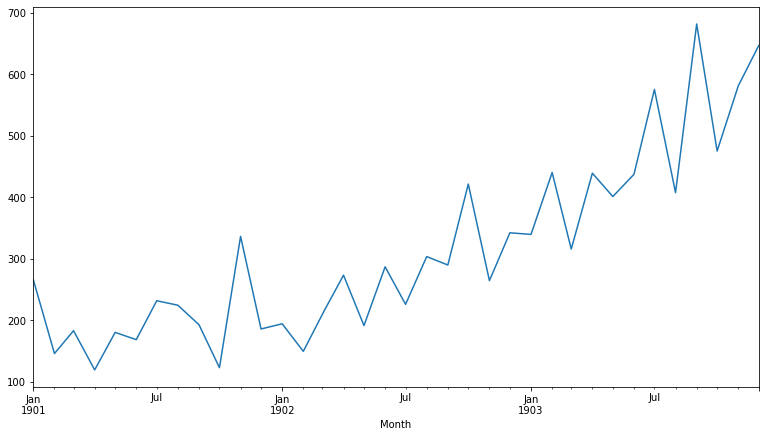

In [26]:
# Interpolating the parameters

interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

Another common interpolation method is to use a polynomial or a spline to connect the values. This create more curves and can look like more naural on many datasets.

Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
1901-01-06    231.727880
1901-01-07    225.575149
1901-01-08    219.651553
1901-01-09    213.957094
1901-01-10    208.491770
1901-01-11    203.255582
1901-01-12    198.248529
1901-01-13    193.470612
1901-01-14    188.921831
1901-01-15    184.602185
1901-01-16    180.511676
1901-01-17    176.650301
1901-01-18    173.018063
1901-01-19    169.614960
1901-01-20    166.440993
1901-01-21    163.496161
1901-01-22    160.780465
1901-01-23    158.293905
1901-01-24    156.036481
1901-01-25    154.008192
1901-01-26    152.209039
1901-01-27    150.639021
1901-01-28    149.298139
1901-01-29    148.186393
1901-01-30    147.303783
1901-01-31    146.650308
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


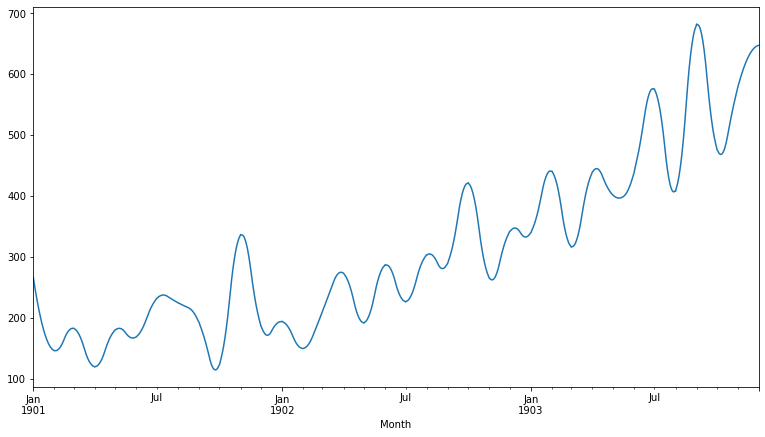

In [27]:
upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='spline', order=2)
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

#### Downsampling Data

The sales data its monthly but perhaps we will that to be quarterly. Instead of creating new rows between existing observations, the resample() functions will group all observations by the new frequency.

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64


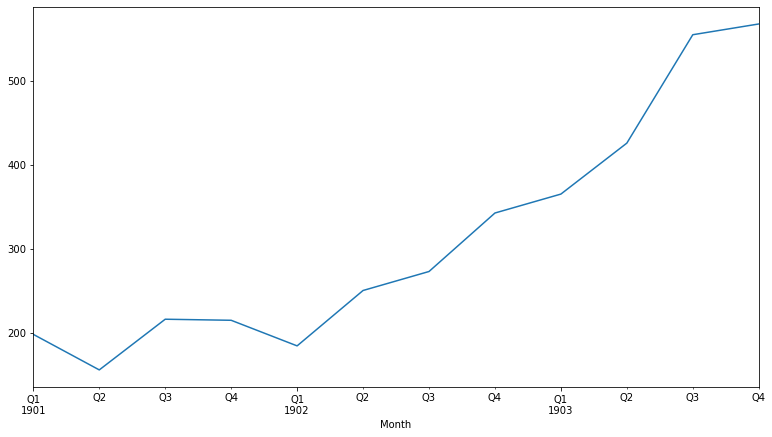

In [28]:
resample = series.resample('Q')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show()

In [ ]:
We can downsample the data using the alias A for year-end frequency and this time use sum to calculate the total sales each year.

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: A-DEC, Name: Sales, dtype: float64


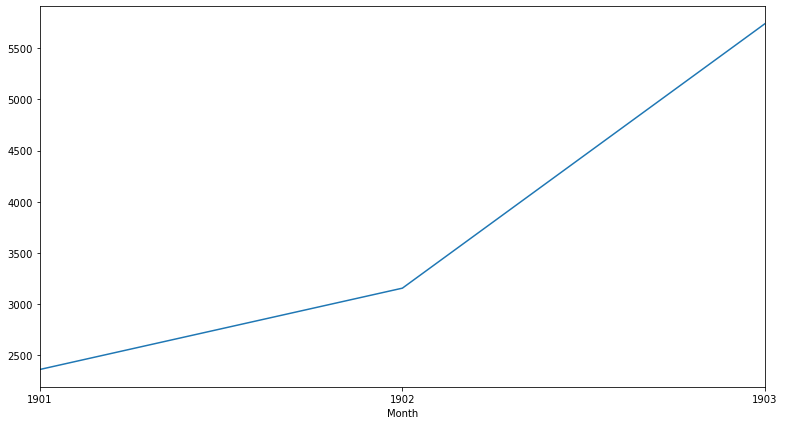

In [29]:
resample = series.resample('A')
yearly_mean_sales = resample.sum()
print(yearly_mean_sales.head())
yearly_mean_sales.plot()
pyplot.show()

### End.